# Assignment 4_Non Parametric tests II

In [4]:
# 1. Import EMPLOYEE SATISFACTION SURVEY data.
import pandas as pd

satsurvey = pd.read_csv("EMPLOYEE SATISFACTION SURVEY.csv")
satsurvey.head()

,id,dept,satlevel,exp
0,1,FINANCE,3,3.0
1,2,IT,4,2.5
2,3,SALES,2,2.0
3,4,FINANCE,4,1.5
4,5,FINANCE,3,1.0


In [5]:
# Check for normality of the data using Shapiro Wilk test.
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

atat,p_value = shapiro(satsurvey['satlevel'])
atat,p_value

(0.8754845857620239, 6.048248542356305e-05)

### Inference: With p-value = 6.048248542356305e-05; p < 0.05 so we reject the H0, which implies the data is non normally distributed

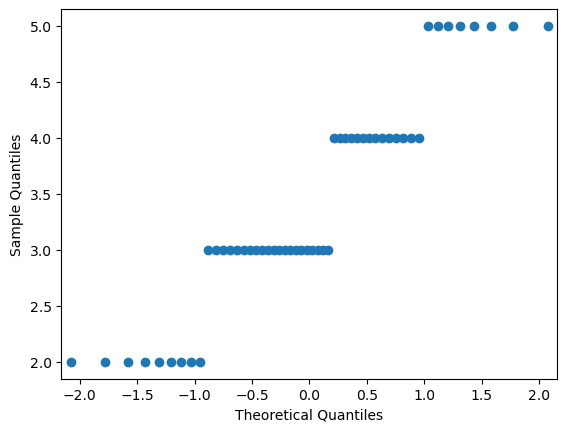

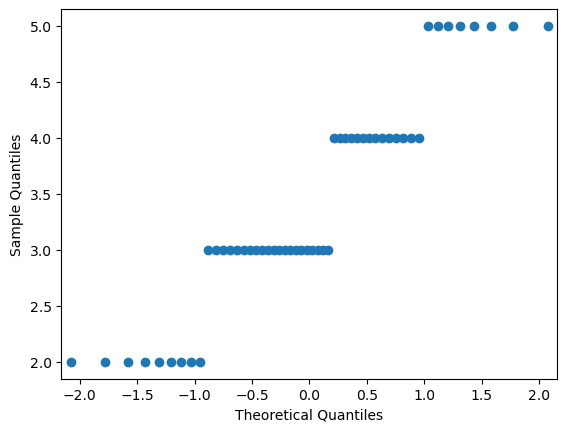

In [8]:
# Graphical test for normality of data using Q-Q Plot
from statsmodels.graphics.gofplots import qqplot

qqplot(satsurvey['satlevel'])

### Inference: Q-Q Plot is non linear, so H0 is rejected, which implies the data is non normally distributed

In [29]:
# Check for normality of data using Lilliefors
from statsmodels.stats.diagnostic import lilliefors

statistic, p_value = lilliefors(satsurvey['satlevel'])
statistic, p_value

0.24072017102693422 0.0009999999999998899


### Inference: With p-value = 0.0009999999999998899; p < 0.05 so we reject the H0, which implies the data is non normally distributed

# 2. Find median satisfaction level for ‘IT’, ‘Sales’ and ‘Finance’. 

In [31]:
satsurvey.groupby('dept')['satlevel'].mean()

dept
FINANCE    4.263158
IT         3.133333
SALES      2.722222
Name: satlevel, dtype: float64

# Test whether the satisfaction level among three roles differ significantly.

In [35]:
# Given non normality of data distribution, we use Kruskal-Wallis test
from scipy.stats import kruskal

satsurvey_kru = satsurvey['satlevel']
roles = satsurvey['dept']
statistic,p_value = kruskal(*[satsurvey_kru[roles==dept] for dept in roles.unique()])
statistic,p_value

(25.51305974929311, 2.8834303621371054e-06)

### Inference: With p-value = 2.8834303621371054e-06, p<0.05 and so H0 is rejected, which implies that satlevel across the three departments differ significantly 

# 3. Is there any association between satisfaction level and experience level? 
## Experience level is defined as midlevel (greater than 2 years) and Junior (less than or equal to 2 years).

In [37]:
# Testing Association btw satlevel and experience level using Chi-Squared test
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(satsurvey['satlevel'], satsurvey['exp'])

chi2_contingency(cont_table)

Chi2ContingencyResult(statistic=40.712698412698415, pvalue=0.16732502606172375, dof=33, expected_freq=array([[0.17307692, 0.34615385, 0.86538462, 2.59615385, 0.34615385,
        2.07692308, 0.51923077, 0.69230769, 0.17307692, 0.86538462,
        0.17307692, 0.17307692],
       [0.40384615, 0.80769231, 2.01923077, 6.05769231, 0.80769231,
        4.84615385, 1.21153846, 1.61538462, 0.40384615, 2.01923077,
        0.40384615, 0.40384615],
       [0.26923077, 0.53846154, 1.34615385, 4.03846154, 0.53846154,
        3.23076923, 0.80769231, 1.07692308, 0.26923077, 1.34615385,
        0.26923077, 0.26923077],
       [0.15384615, 0.30769231, 0.76923077, 2.30769231, 0.30769231,
        1.84615385, 0.46153846, 0.61538462, 0.15384615, 0.76923077,
        0.15384615, 0.15384615]]))

### Inference: Since p_value =  0.16732502606172375; p > 0.05 and thus H0 is accepted, which implies that there is no association between 'Satisfaction Level' (satlevel) and 'Experience Level' (exp) 

# 4. Find number of employees with satisfaction score greater than 3 in each department

In [45]:
import numpy as np

satsurvey['dept'] = np.where(satsurvey['satlevel'] > 3, 'Yes','No')
table_department = pd.value_counts(satsurvey['dept'])
table_department

dept
No     30
Yes    22
Name: count, dtype: int64

### # Inference: The total number of employees with satlevel score greater than 3 across all the departments is 22.